In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/diabetes_dataset.csv


In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# creating a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation ,Dropout , Flatten
from tensorflow.keras.optimizers import Adam

# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory


In [3]:

df = pd.read_csv('/kaggle/input/diabetes-dataset/diabetes_dataset.csv')
df.head()


,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
0,69,5,28.39,130.1,77.0,5.4,130.4,44.0,50.0,90.5,107.9,0.84,0,0,0,1,0
1,32,1,26.49,116.5,72.0,4.5,87.4,54.2,129.9,113.3,81.4,1.39,0,0,0,0,0
2,89,13,25.34,101.0,82.0,4.9,112.5,56.8,177.6,84.7,107.2,0.79,0,0,0,1,0
3,78,13,29.91,146.0,104.0,5.7,50.7,39.1,117.0,108.9,110.0,0.99,0,0,0,1,1
4,38,8,24.56,103.2,74.0,4.7,102.5,29.1,145.9,84.1,92.8,0.91,0,1,0,0,0


In [4]:
df.shape

(9538, 17)

In [5]:
df.isna().sum()

Age                   0
Pregnancies           0
BMI                   0
Glucose               0
BloodPressure         0
HbA1c                 0
LDL                   0
HDL                   0
Triglycerides         0
WaistCircumference    0
HipCircumference      0
WHR                   0
FamilyHistory         0
DietType              0
Hypertension          0
MedicationUse         0
Outcome               0
dtype: int64

In [6]:
# sns.pairplot(df, hue="Outcome")

In [7]:
x= df.drop("Outcome" , axis=1)
y= df ["Outcome"]

# FIRST ONE XGBOOST

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
x, y, test_size=0.2, random_state=42)

# pip install xgboost


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1275
           1       1.00      1.00      1.00       633

    accuracy                           1.00      1908
   macro avg       1.00      1.00      1.00      1908
weighted avg       1.00      1.00      1.00      1908



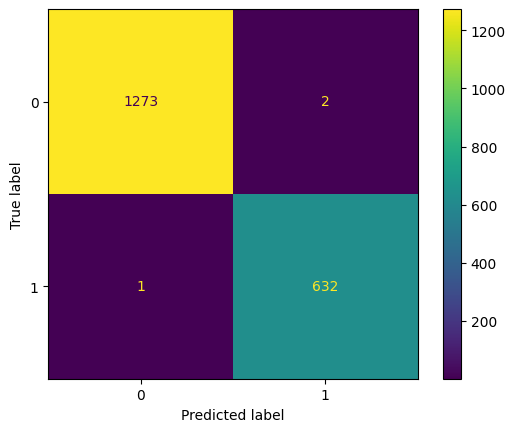

In [9]:
import xgboost as xgb

model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

model.fit(X_train,y_train)
pred = model.predict(X_test)

print(classification_report(y_test,pred))

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)



# ANN 

In [10]:
y_train.shape
y_test.shape
from tensorflow.keras.utils import to_categorical

y_test = to_categorical(y_test,2)
y_train = to_categorical(y_train,2)


In [11]:

y_test.shape

(1908, 2)

In [12]:
y_train.shape

(7630, 2)

In [13]:
scaler = MinMaxScaler()
scaler_X_train = scaler.fit_transform(X_train)
scaler_X_test = scaler.transform(X_test)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.initializers import HeUniform
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.regularizers import l2

model = Sequential([
    Dense(units=64, activation='relu', kernel_initializer=HeUniform(), kernel_constraint=MaxNorm(max_value=3), kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    BatchNormalization(),
    Dense(256, activation="relu", kernel_initializer=HeUniform()),
    Dense(128, activation="relu", kernel_initializer=HeUniform()),
    BatchNormalization(),
    Dense(32, activation="relu", kernel_initializer=HeUniform()),
    Dense(2, activation="sigmoid")  
])


* units=64:

This parameter specifies the number of neurons in the layer.

* kernel_constraint=MaxNorm(max_value=3):

The kernel_constraint defines a constraint to be applied to the weights.

kernel_regularizer is a parameter used for regularizing the weights. Regularization is used to prevent the model from overfitting. It helps the model generalize better by adding a penalty to the size of the weights.

This is used to keep the weights within a specific range during the learning process. MaxNorm(max_value=3) ensures that the norm (magnitude) of each weight does not exceed 3. In other words, the size of the weights is constrained within a defined limit.

* units=64: There will be 64 neurons in this layer.

* activation='relu': Each neuron will use the ReLU activation function.

* kernel_initializer=HeUniform(): The weights will be initialized randomly with the He initialization method.

* kernel_constraint=MaxNorm(max_value=3): The weights' norm will be constrained to not exceed 3.

This layer is designed to facilitate faster learning and improve generalization by using weight initialization, activation functions, and weight constraints.

In [15]:
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss="binary_crossentropy", 
              metrics=["accuracy"])

fit = model.fit(scaler_X_train , y_train , epochs=100 , batch_size=64 , validation_data=(scaler_X_test , y_test))

Epoch 1/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7935 - loss: 1.5847 - val_accuracy: 0.9649 - val_loss: 0.9588
Epoch 2/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9691 - loss: 0.8322 - val_accuracy: 0.9602 - val_loss: 0.6120
Epoch 3/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9710 - loss: 0.5319 - val_accuracy: 0.9617 - val_loss: 0.4176
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9668 - loss: 0.3605 - val_accuracy: 0.9607 - val_loss: 0.3622
Epoch 5/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9750 - loss: 0.2423 - val_accuracy: 0.9623 - val_loss: 0.2705
Epoch 6/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9795 - loss: 0.1765 - val_accuracy: 0.9638 - val_loss: 0.2343
Epoch 7/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9808 - loss: 0.1394 - val_accuracy: 0.9775 - val_loss: 0.1175
Epoch 8/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9796 - loss: 0.1167 - val_accu

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


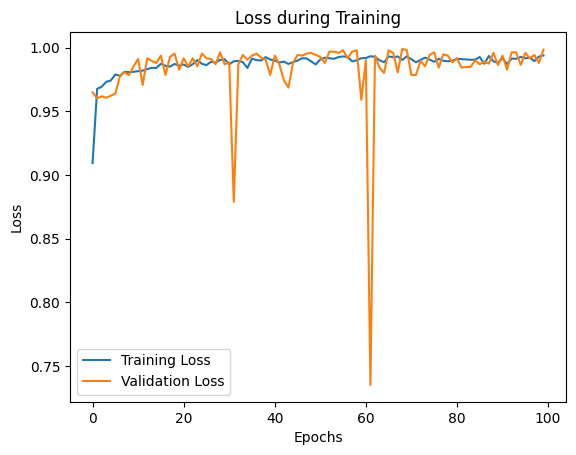

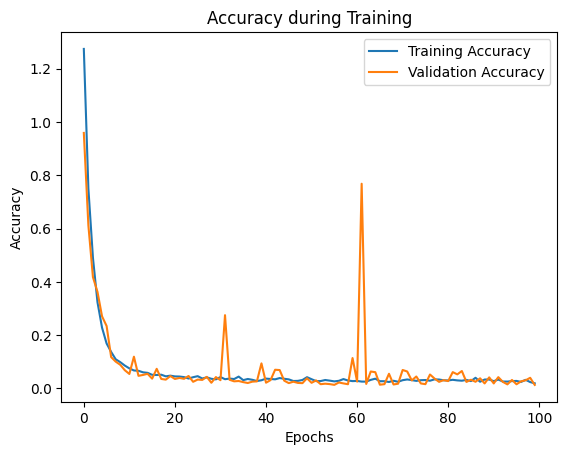

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1275
           1       1.00      1.00      1.00       633

   micro avg       1.00      1.00      1.00      1908
   macro avg       1.00      1.00      1.00      1908
weighted avg       1.00      1.00      1.00      1908
 samples avg       1.00      1.00      1.00      1908



In [16]:
pred = model.predict(scaler_X_test)
pred = (pred > 0.5).astype(int)  

# LOSS
plt.plot(fit.history['accuracy'], label='Training Loss')
plt.plot(fit.history['val_accuracy'], label='Validation Loss')
plt.title('Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy
plt.plot(fit.history['loss'], label='Training Accuracy')
plt.plot(fit.history['val_loss'], label='Validation Accuracy')
plt.title('Accuracy during Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(classification_report(y_test , pred))


# L1 or L2 Regularization?

* L1 Regularization (Lasso Regularization):

L1 regularization introduces sparsity to the weights, meaning it drives some weights to zero.

This results in fewer neurons or features being selected, as the zeroed-out weights effectively disable the contribution of those neurons or features. L1 regularization is useful when feature selection is needed, as it helps simplify the model by zeroing out the weights of unnecessary features or neurons.

* L2 Regularization (Ridge Regularization):
  
L2 regularization tries to shrink the weights, but it does not make them exactly zero.

This keeps the weights small, which helps the model become more generalized.

L2 regularization is typically used when there are many features, as it ensures all features are learned, but the weights are kept from growing too large. L2 also helps prevent overfitting of the model.

## When to Use Which?

* L1 Regularization:

If you want to perform feature selection and remove unnecessary features from the model, L1 is the better choice.

It is also useful when working with large, sparse datasets.

You can use L1 regularization when you believe some features are not contributing significantly.

* L2 Regularization:

When dealing with larger datasets and more features, and you want to learn the contribution of each feature while keeping the weights small, L2 regularization is beneficial.

It is more commonly used to prevent overfitting.

Use L2 when you want most features to contribute to the model, but without their magnitudes becoming too large.

from tensorflow.keras.regularizers import l1, l2, l1_l2


L1: Use when you want to reduce the number of features or eliminate some entirely.

L2: Use when you want to shrink the weights and create a more generalized model.

L1_L2: Use when you want to apply both types of regularization.

Both regularization types help prevent overfitting, but which one you should use depends on the specific requirements of your model.

In [17]:
# from tensorflow.keras.regularizers import l1, l2, l1_l2


# Dense(64, activation='relu', kernel_regularizer=l1(0.01))  # L1 

# # L2
# Dense(64, activation='relu', kernel_regularizer=l2(0.01))  # L2 

# # L1 + L2 
# Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01))  # L1 + L2 

# Conclusion:

* L1: Use when you want to reduce the number of features or eliminate some entirely.

* L2: Use when you want to shrink the weights and create a more generalized model.

* L1_L2: Use when you want to apply both types of regularization.

Both regularization types help prevent overfitting, but which one you should use depends on the specific requirements of your model.

